## Exercise 1

In this exercise you need to plot ocean depth against ocean age. You have the topography / bathymetry data and the age data. You should do this for the "deep oceans" to avoid including the continental shelves and, for that matter, the continents. The age dataset is only valid where there are magnetic stripes. Other places in the grid are flagged as _"Not a Number"_ or _NaN_ and will not plot. You might have to strip out these points for plotting / curve fitting though.

### Instructions 

You can submit this notebook by email but you MUST rename it so we know who it is from. If you used a crazy pseudonym, please let us know when you submit your assigments. 

I expect to be able to run this notebook before I read your answer!

In [1]:
%pylab inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Hint

You will need to have the two datasets at the same resolution and valid data shape. The data are stored in an image so re-interpolation can be done with the image resizing fanciness available in ... (guess where !)

In [2]:
from skimage.transform import resize as imresize

# load in ETOPO1 data
with np.load("../Data/Resources/ETOPO1_Ice_c_geotiff.npz", 'r') as npz:
    etopoH_img = npz['data']

# resample
etopoH_img = etopoH_img[::4,::4]

# load in age data
ages = np.load("../Data/Resources/global_age_data.3.6.z.npz")["ageData"]

etopoH_1 = imresize(etopoH_img, ages.shape, order=1, mode='wrap', preserve_range=True)
etopoH_1[ np.isnan(ages) ] = np.nan

print (etopoH_img.shape)
print (etopoH_1.shape)
print (ages.shape)

(2700, 5400)
(1801, 3601)
(1801, 3601)


## Task

Make a map of `etopoH_1` and `ages` (check they are the same shape and same NaN mask)

It may also help to plot plate motion arrows on the map to highlight divergent v. convergent zones. In order to do this "intuitively" you probably should choose the NNR (no net rotation) velocity field which tends to show major ridges as spreading in opposite directions. 

You will need to think about:

  * which features are useful to include (a coastline, shaded relief etc ?) 
  * plate motion arrows (see `GlobalPlateMotions` notebook) ? 

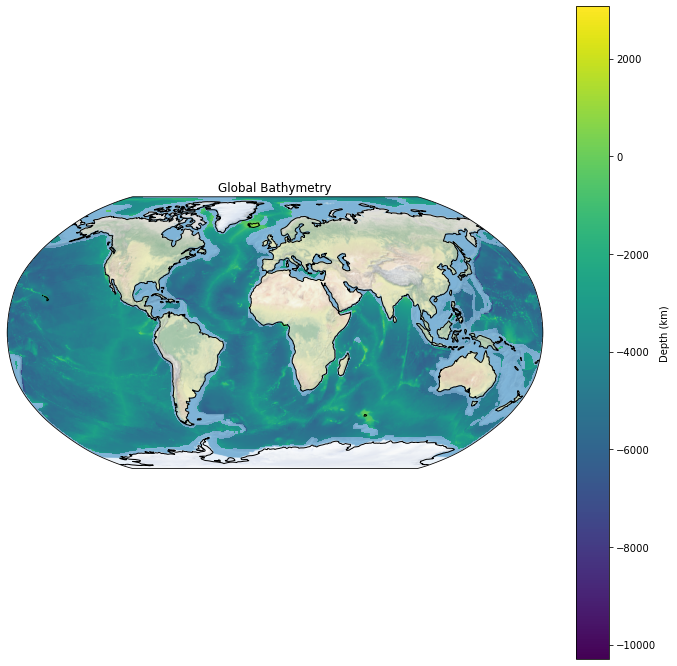

In [3]:
## Code here 

#basemap with coastlines and filled continents 
fig = plt.figure(figsize=(12, 12),facecolor="none")
ax  = plt.axes(projection=ccrs.Robinson())

ax.set_global()
ax.coastlines()
ax.stock_img()

#etopoH_1
plt.imshow(etopoH_1, transform=ccrs.PlateCarree())
plt.title(label='Global Bathymetry')
plt.colorbar(label='Depth (km)') 

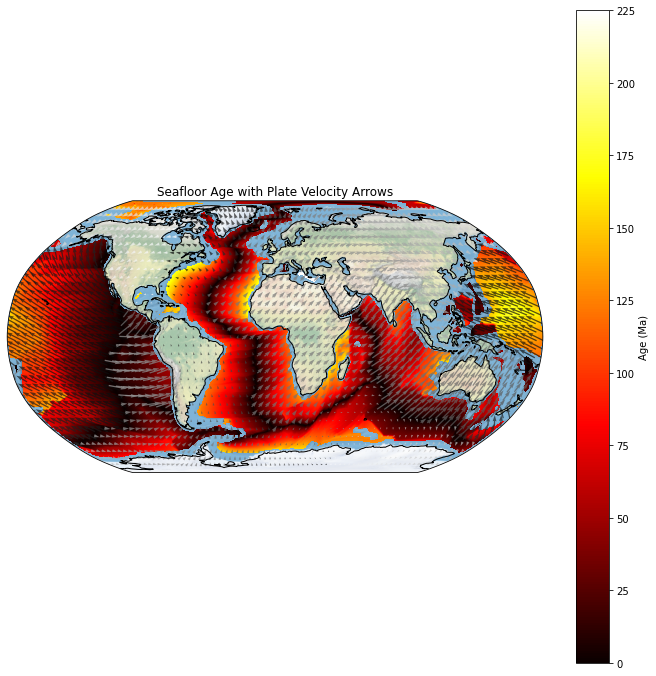

In [4]:
## Code here 

#basemap with coastlines and filled continents 
fig = plt.figure(figsize=(12, 12),facecolor="none")
ax  = plt.axes(projection=ccrs.Robinson())

ax.set_global()
ax.coastlines()
ax.stock_img()

#ages
plt.imshow(ages, transform = ccrs.PlateCarree(), zorder = 0, cmap = 'hot')
plt.title(label='Seafloor Age with Plate Velocity Arrows')
#slightly bring in the limits of the colour scale to minimise the effect of the age "outliers" (that abnoramlly old oceanic crust stuck in the Mediterranean) and create more contrast
plt.clim(0,225)
plt.colorbar(label='Age (Ma)')

#Plate motion arrows 
import numpy as np 
from scipy.io import netcdf
vel = netcdf.netcdf_file(filename="../Data/Reference/velocity_NNR.nc", version=2)

ve = vel.variables["ve"]
vn = vel.variables["vn"]

lonv = vel.variables["lon"]
latv = vel.variables["lat"]

lons = lonv[::5]
lats = latv[::5]
llX, llY = np.meshgrid(lons,lats)

#llX = llX.reshape(-1)
#llY = llY.reshape(-1)

Veast = (np.array(ve[::5,::5]).T)
Vnorth = (np.array(vn[::5,::5]).T)

Vorientation = np.arctan2(Vnorth,Veast)

mappable1 = ax.quiver(llX, llY, Veast, Vnorth, Vorientation, scale=2000, transform=ccrs.PlateCarree(),
        cmap=cm.Greys, alpha=0.7, zorder=1, pivot="mid")

### Task

Make a scatter plot of the depth against age. You might need to downsample the number of points as there are a lot of them:

```python 
ages_decimated = ages[::10]
topo_decimated = etopoH[::10]
``` 

Do you see any systematic trend ?

**Hint:** don't worry if you do not 

Text(0.5, 0, 'Age (Ma)')

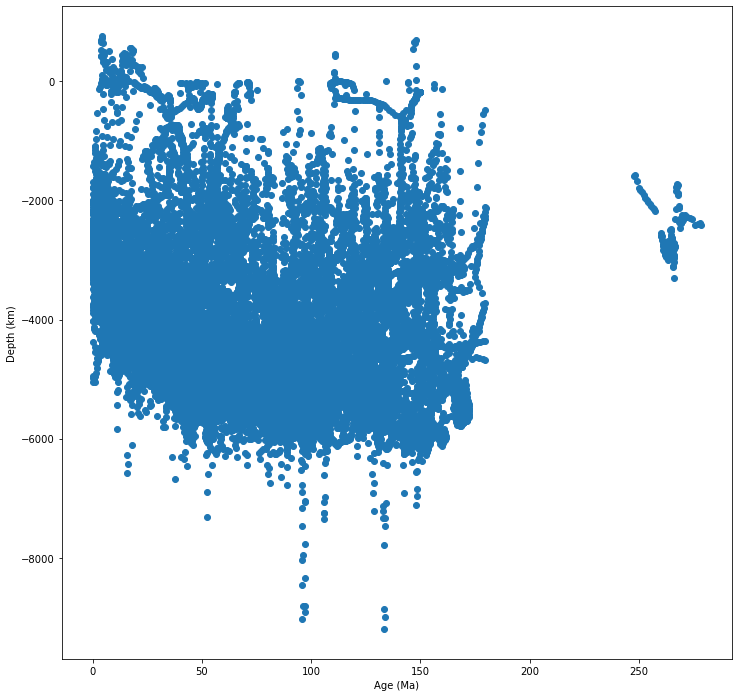

In [5]:
## Code here 
#downsampling
ages_decimated = ages[::80]
topo_decimated = etopoH_1[::80]
# [::10] was still leaving a lot of points, the data was mostly just a block of blue.
#Don't want to downsample too much as that seems to remove most/all of the oldest points/outliers

#plot age vs depth
fig = plt.figure(figsize=(12, 12),facecolor="none")
plt.scatter(ages_decimated, topo_decimated)
plt.ylabel( 'Depth (km)' ) 
plt.xlabel( 'Age (Ma)' )


#No clear trend, the block of points does seem to be vaguely increasing in depth with increased age (apart from the oldest outliers which may be the stuck oceanic crust that is not getting subducted?)

# Smoothing

Now try interpolating the bathymetry to a smoothed / downsampled version of the ages.

```python
ages_reduced = ages[::8,::8] # This is arbitrary, you should try some different ones

# OR

ages_reduced1 = imresize(ages, (226,451), order=0, mode="wrap")

# OR

ages_reduced2 = imresize(ages, (226,451), order=1, mode="wrap")

# OR

ages_reduced3 = imresize(ages, (226,451), order=3, mode="wrap")

```

Comment on which of these is the more effective.


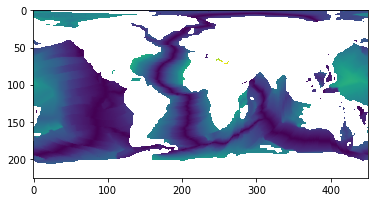

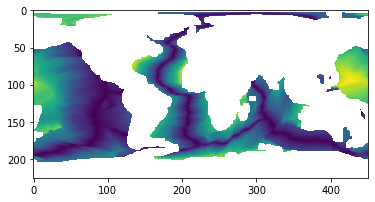

In [6]:
ages_reduced  = ages[::8,::8] # This is arbitrary, you should try some different ones
plt.imshow(ages_reduced)
plt.show()

ages_reduced2 = imresize(ages, (226,451), order=3, mode="wrap", preserve_range=True)
plt.imshow(ages_reduced2)
plt.show()

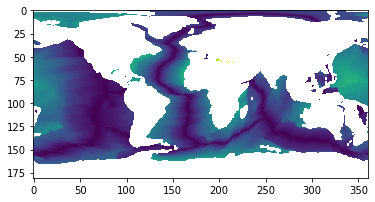

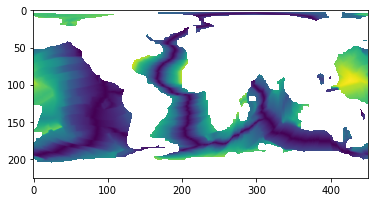

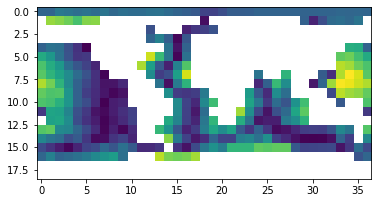

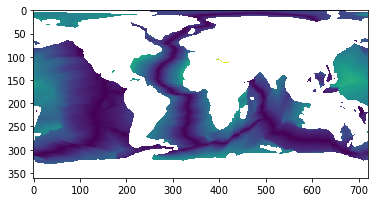

In [7]:
## Have a go ... 

ages_reduced = ages[::10,::10]
plt.imshow(ages_reduced)
plt.show()

ages_reduced1 = imresize(ages, (226,451), order=0, mode="wrap", preserve_range=True)
plt.imshow(ages_reduced1)
plt.show()

ages_reduced3 = ages[::100,::100]
plt.imshow(ages_reduced3)
plt.show()

ages_reduced4 = ages[::5,::5]
plt.imshow(ages_reduced4)
plt.show()

#Taking [::10,::10] or less appears to be the optimal downsampling technique and creates fairly smooth data (imresize creates more contrast or a bigger range of values but unsure why that is)


### Task

Plot the age/depth data and see if it looks smoother.

Make a scatterplot with this data too (note: you will have to downsample the bathymetry too)

Does smoothing help bring out a trend ?


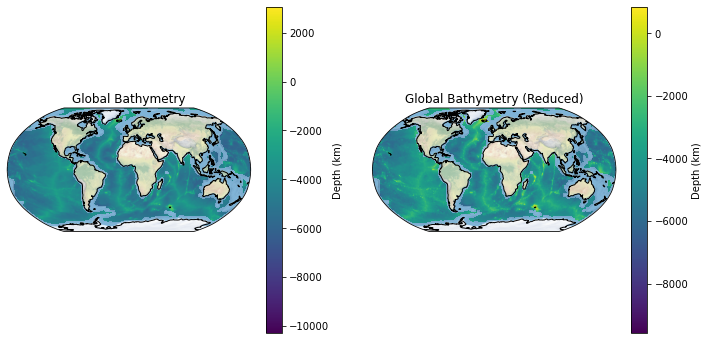

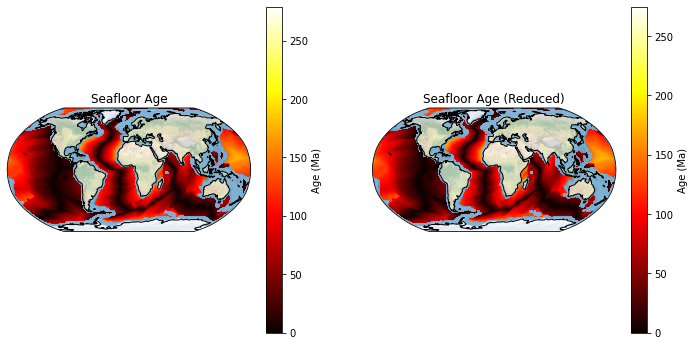

In [8]:
### Your code here 

#reduce depth data in same way
etopo_reduced = etopoH_1[::10,::10]

#plot before vs after maps for comparison 
#plot figure: depth

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1, projection=ccrs.Robinson())
ax1.set_global()
ax1.coastlines()
ax1.stock_img()
ax1 = plt.imshow(etopoH_1, transform=ccrs.PlateCarree())
ax1 = plt.title(label = 'Global Bathymetry')
ax1 = plt.colorbar(label = 'Depth (km)')

ax2 = fig.add_subplot(1,2,2, projection=ccrs.Robinson())
ax2.set_global()
ax2.coastlines()
ax2.stock_img()
ax2 = plt.imshow(etopo_reduced, transform=ccrs.PlateCarree())
ax2 = plt.title(label = 'Global Bathymetry (Reduced)')
ax2 = plt.colorbar(label='Depth (km)')


#plot figure: age vs reduced age

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1, projection=ccrs.Robinson())
ax1.set_global()
ax1.coastlines()
ax1.stock_img()
ax1 = plt.imshow(ages, transform=ccrs.PlateCarree(), cmap = 'hot')
ax1 = plt.title(label = 'Seafloor Age')
ax1 = plt.colorbar(label = 'Age (Ma)')

ax2 = fig.add_subplot(1,2,2, projection=ccrs.Robinson())
ax2.set_global()
ax2.coastlines()
ax2.stock_img()
ax2 = plt.imshow(ages_reduced, transform=ccrs.PlateCarree(), cmap = 'hot')
ax2 = plt.title(label = 'Seafloor Age (Reduced)')
ax2 = plt.colorbar(label='Age (Ma)')

#The "reduced" plot seems to bring out more constrast in the depth data, I'm not sure if that makes it "smoother" or not - it doesn't look particularly smooth
# The age plots look exaclty the same, I wonder if that is because I imposed limits on the colour scales. 

### Task

Fit $ \textrm{depth} = A + B\sqrt{\textrm{age}} $ to this data and create a plot

You should be able to use 

```python
from scipy.optimize import curve_fit
help(curve_fit)
```



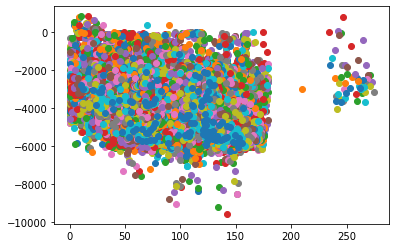

In [9]:
### Your code here 
from scipy.optimize import curve_fit

#create depth function
def func(x, a, b):
    return a + b*np.sqrt(x)

#add in data sets
xdata=ages_reduced 
ydata=etopo_reduced

plt.plot(xdata, ydata, 'o', label='data')


func(x, a=-3335.072411098632, b=-103.74150152622427)


Text(0.5, 0, 'Age (Ma)')

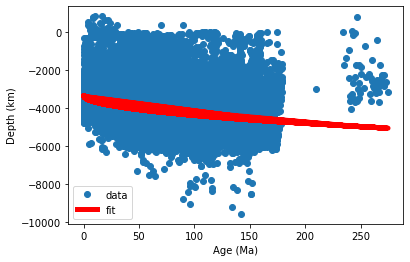

In [10]:
#Get rid of Nans 
xdata = xdata[~np.isnan(xdata)]
ydata = ydata[~np.isnan(ydata)]

#Optimising curve
popt, pcov = curve_fit(func, xdata, ydata)
print ("func(x, a={}, b={})".format(popt[0], popt[1]))

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit', linewidth=5)
plt.legend()
plt.ylabel( 'Depth (km)' ) 
plt.xlabel( 'Age (Ma)' )

In [11]:
#fit/trend is quite weak, there is a fair bit of error on either side of the line (particularly above the line - effect of sediment loading?)
#Vague trend of getting deeper as crust ages, as discussed above
#those oldest points all lie above the curve, as discussed they may be the abnormally old crust (in the Mediterranean?) that is just kind of stuck in the basin

### Discussion

Obviously there are problems with the data - looking at every pixel in the image does not account for regions where there are sea mounts or other features on the ocean floor that we might consider anomalous. Actually, the other reason this doesn't work very well is that it fails to account for sediment accumulation and loading.